# Sklearn

## sklearn.linear_model

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np
%matplotlib inline

### Линейная регрессия

#### Генерация данных

In [5]:
data, target, coef = datasets.make_regression(n_features=2, n_informative=1, n_targets=1, 
                                              noise=5, coef=True, random_state=2)

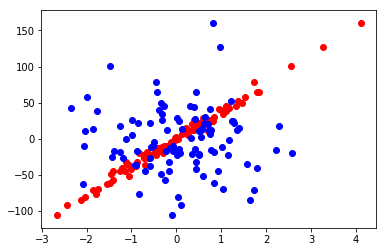

In [16]:
plt.scatter([i[0] for i in data], target, color='r')

plt.scatter([i[1] for i in data], target, color='b');

In [19]:
train_data, test_data, train_labels, test_labels = train_test_split(data, target,  
                                                                    test_size = 0.3)

#### LinearRegression

In [20]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [21]:
test_labels

array([ 28.15553021, -16.65927231,  29.8208999 ,  11.96165156,
       -32.92158843, -11.18242389,  12.47089016, -16.79027112,
         4.45578287, -91.477377  , -12.0017312 , -42.44469577,
         1.72644759,  13.02656201,  45.05465366, -14.97110322,
        27.83791274,  12.67156468,  25.7124082 , -16.30914909,
       -80.80239408,  58.26281761, -22.64686884,  10.33267887,
       -27.02798161,   0.34799656,  21.20540389, -48.28700118,
       -10.06708677, -15.01435792])

In [22]:
predictions

array([ 2.27095382e+01, -1.46588090e+01,  3.17290695e+01,  1.40366968e+01,
       -3.39565191e+01, -1.29988470e+01,  2.01083533e+01, -1.47010413e+01,
        9.03927837e+00, -9.33622686e+01, -6.81543399e+00, -3.91539761e+01,
       -3.61249507e-02,  1.88073533e+01,  4.23246752e+01, -1.24690376e+01,
        2.32415893e+01,  1.41493335e+01,  2.79835070e+01, -1.19167401e+01,
       -7.83085156e+01,  5.73297379e+01, -1.74221550e+01,  9.17586842e+00,
       -2.52565514e+01, -1.65400740e+00,  1.68970359e+01, -5.60449051e+01,
       -1.00230288e+01, -9.51384288e+00])

In [23]:
metrics.mean_absolute_error(test_labels, predictions)

3.188629673064204

In [30]:
linear_scoring = cross_val_score(linear_regressor, data, target, 
                                 scoring='neg_mean_absolute_error', cv=10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779695, std: 1.0737104492890204


In [31]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [33]:
linear_scoring = cross_val_score(linear_regressor, data, target, scoring=scorer, cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779695, std: 1.0737104492890204


In [34]:
coef

array([38.07925837,  0.        ])

In [35]:
linear_regressor.coef_

array([38.24554013,  0.48127728])

In [36]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.29752025618262906

In [39]:
print("y = {:.2f} * x1 + {:.2f} * x2".format(coef[0], coef[1]))

y = 38.08 * x1 + 0.00 * x2


In [40]:
print("y = {:.2f} * x1 + {:.2f} * x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.25 * x1 + 0.48 * x2 + -0.30


#### Lasso

In [41]:
lasso_regressor = linear_model.Lasso(random_state=3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [43]:
lasso_scoring = cross_val_score(lasso_regressor, data, target, scoring=scorer, cv=10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666397, std: 1.0170354384993354


In [44]:
lasso_regressor.coef_

array([37.55927307,  0.        ])

In [45]:
print("y = {:.2f} * x1 + {:.2f} * x2".format(coef[0], coef[1]))

y = 38.08 * x1 + 0.00 * x2


In [46]:
print("y = {:.2f} * x1 + {:.2f} * x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.56 * x1 + 0.00 * x2
